In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib as plt
from matplotlib import pyplot
!pip install geopandas
import geopandas
! pip install pycountry
import pycountry 


In [210]:
og_df = pd.read_csv("OlympicHistoryAthletes.csv")
og_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [219]:
gold_winners=og_df[og_df["Medal"] == "Gold"]
slv_winners= og_df[og_df["Medal"] == "Silver"]
brnz_winners=og_df[og_df["Medal"] == "Bronze"]

print("Num gold: {}, Num silver: {}, Num Bronze: {}".format(gold_winners.shape[0], slv_winners.shape[0], brnz_winners.shape[0]))

Num gold: 13372, Num silver: 13116, Num Bronze: 13295


In [220]:
# Aggregate counts by Team, Year. Remove multiindex to simplify plotting
gold_df = gold_winners.groupby(['Team','Year'], as_index=False)
gold_df = gold_df.agg({'Medal': ['count']})
gold_df.columns = list(map(''.join, gold_df.columns.values))
gold_df = gold_df.sort_values("Year")

slv_df = slv_winners.groupby(['Team','Year'], as_index=False)
slv_df = slv_df.agg({'Medal': ['count']})
slv_df.columns = list(map(''.join, slv_df.columns.values))
slv_df = slv_df.sort_values("Year")

brnz_df = brnz_winners.groupby(['Team','Year'], as_index=False)
brnz_df = brnz_df.agg({'Medal': ['count']})
brnz_df.columns = list(map(''.join, brnz_df.columns.values))
brnz_df = brnz_df.sort_values("Year")

In [221]:
# gold_df = gold_df.reset_index(level=1)
gold_df.head()
print(gold_df.columns)
print(gold_df["Year"].min())

Index(['Team', 'Year', 'Medalcount'], dtype='object')
1896


In [222]:
# 242 Teams is too many, filter to only those with > 20 gold medals in the 120 years
gold_reduced = gold_winners.groupby(['Team'], as_index=False)
gold_reduced = gold_reduced.agg({'Medal': ['count']})
gold_reduced.columns = list(map(''.join, gold_reduced.columns.values))

In [239]:
print(gold_reduced.columns)
gold_reduced = gold_reduced[gold_reduced["Medalcount"] > 40]
gold_reduced.shape

best_countries = list(gold_reduced["Team"])
print(len(best_countries))

# Filter out low medalcount coutnries
gold_reduced = gold_reduced[gold_reduced["Team"].isin(best_countries)]

Index(['Team', 'Year', 'Medalcount', 'ID'], dtype='object')
47


In [240]:
gold_reduced = gold_reduced.sort_values(["Year"])
gold_reduced["ID"] = [i for i in range(1,gold_reduced.shape[0]+1)]
gold_reduced.head()
gold_reduced.shape

(47, 4)

In [ ]:
a_dims = (30, 20)
fig, ax = pyplot.subplots(figsize=a_dims)
sns.lineplot(data=gold_reduced, x="ID", y="Medalcount", hue="Team", style="Team", markers= True)

In [247]:
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
gold_world_df = gold_winners.groupby(['Team'], as_index=False)
gold_world_df = gold_world_df.agg({'Medal': ['count']})
gold_world_df.columns = list(map(''.join, gold_world_df.columns.values))
gold_world_df['CODE']=alpha3code(gold_world_df.Team)
gold_world_df.head()

slv_world_df = slv_winners.groupby(['Team'], as_index=False)
slv_world_df = slv_world_df.agg({'Medal': ['count']})
slv_world_df.columns = list(map(''.join, slv_world_df.columns.values))
slv_world_df['CODE']=alpha3code(slv_world_df.Team)
slv_world_df.head()

brnz_world_df = gold_winners.groupby(['Team'], as_index=False)
brnz_world_df = brnz_world_df.agg({'Medal': ['count']})
brnz_world_df.columns = list(map(''.join, brnz_world_df.columns.values))
brnz_world_df['CODE']=alpha3code(brnz_world_df.Team)
brnz_world_df.head()

,Team,Medalcount,CODE
0,Algeria,5,DZA
1,Amateur Athletic Association,5,None
2,Ancora,4,None
3,Angelita,12,None
4,Argentina,91,ARG


In [248]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
world.head()

world_gold=pd.merge(world,gold_world_df,on='CODE')
world_gold.head()

world_slv=pd.merge(world,slv_world_df,on='CODE')
world_slv.head()

world_brnz=pd.merge(world,brnz_world_df,on='CODE')
world_brnz.head()

,pop_est,continent,name,CODE,gdp_md_est,geometry,Team,Medalcount
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,13
1,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,422
2,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,2474
3,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,20
4,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,10


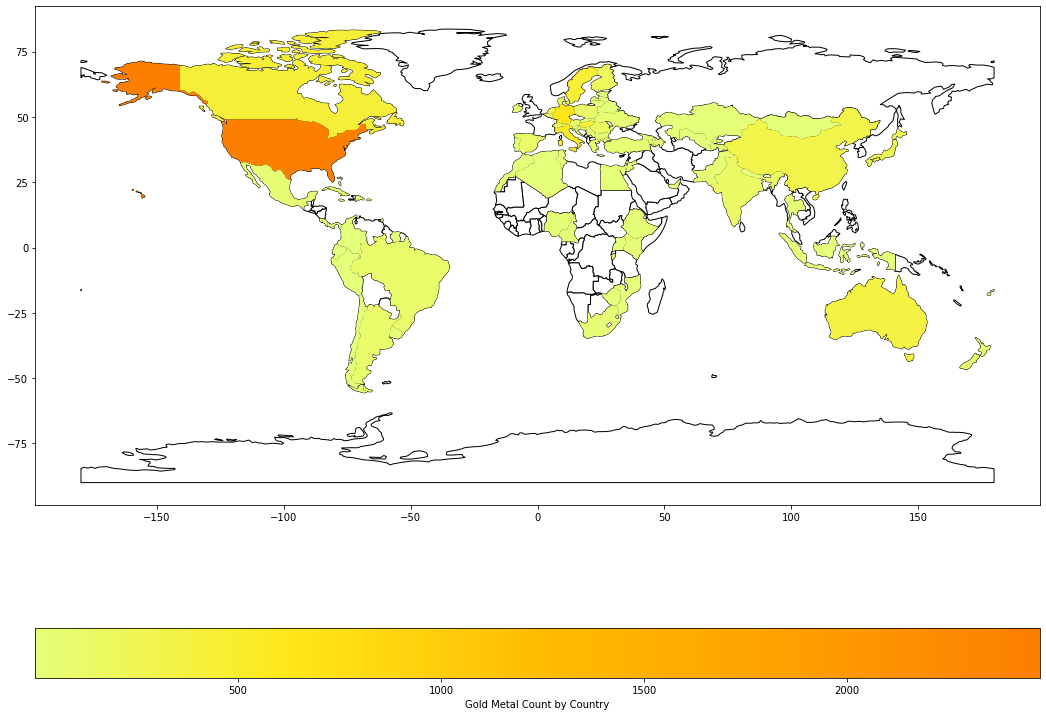

In [249]:
a_dims = (18, 15)
fig, ax = pyplot.subplots(figsize=a_dims)
base = world.plot(color='white', ax=ax, edgecolor='black')
world_gold.plot(column='Medalcount', ax=base, cmap='Wistia',  legend= True,
                legend_kwds={'label': "Gold Metal Count by Country", 'orientation': "horizontal"})

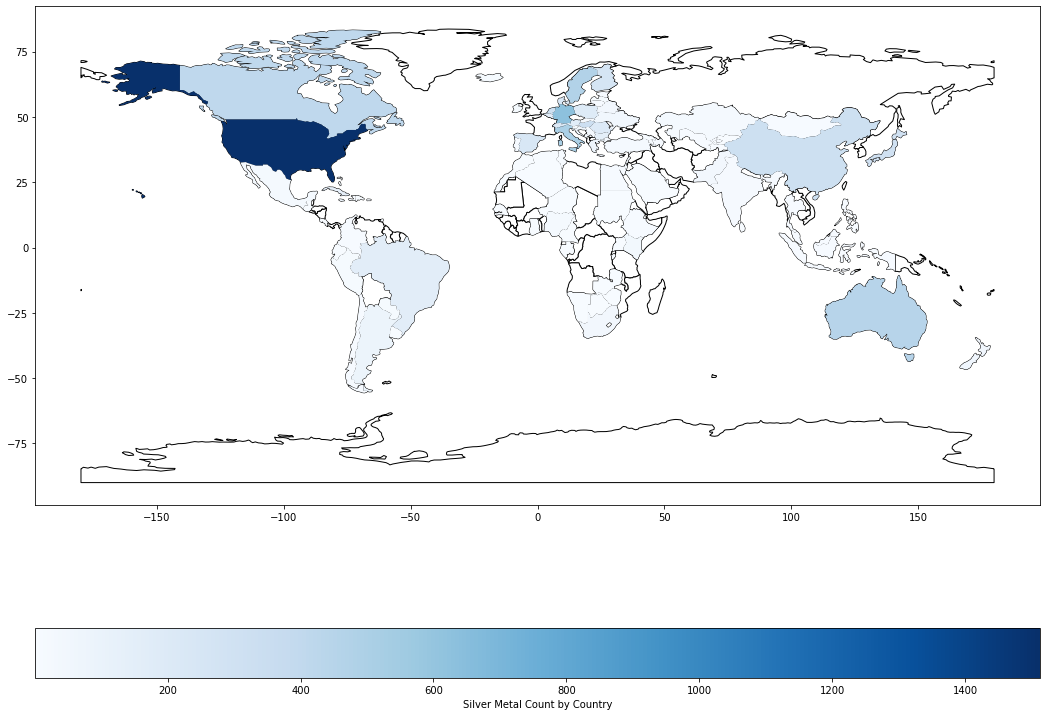

In [254]:
a_dims = (18, 15)
fig, ax = pyplot.subplots(figsize=a_dims)
base = world.plot(color='white', ax=ax, edgecolor='black')
world_slv.plot(column='Medalcount', ax=base, cmap='Blues',  legend=True,
               legend_kwds={'label': "Silver Metal Count by Country", 'orientation': "horizontal"})

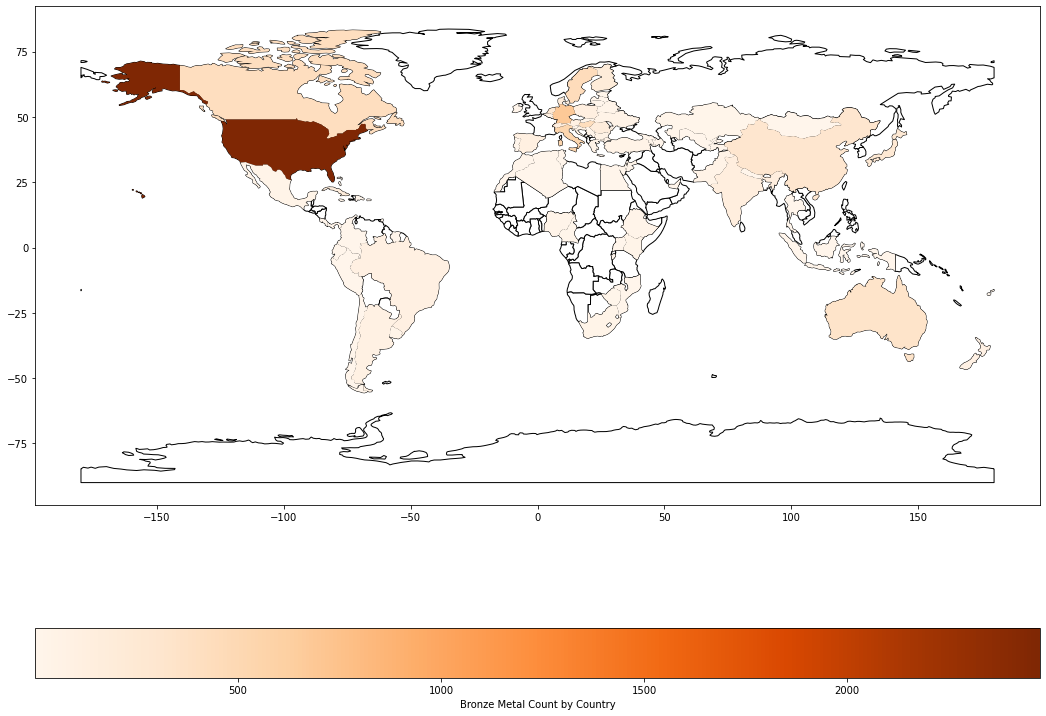

In [255]:
a_dims = (18, 15)
fig, ax = pyplot.subplots(figsize=a_dims)
base = world.plot(color='white', ax=ax, edgecolor='black')
world_brnz.plot(column='Medalcount', ax=base, cmap='Oranges',  legend=True,
                legend_kwds={'label': "Bronze Metal Count by Country", 'orientation': "horizontal"})

In [ ]:
# countries= gold_winners['Team'].unique()

# # Will hold dict of {team : df(team's gold winners)}
# gold_countries = dict()
# for x in countries:
#   gold_countries[x]=gold_winners[gold_winners["Team"]==x]

# # slv
# countries= slv_winners['Team'].unique()
# slv_countries = dict()
# for x in countries:
#   slv_countries[x]=slv_winners[slv_winners["Team"]==x]

# # brnz
# countries= brnz_winners['Team'].unique()
# brnz_countries = dict()
# for x in countries:
#   brnz_countries[x]=brnz_winners[brnz_winners["Team"]==x]

# # ex:
# gold_countries["China"].head()

In [ ]:
# # dict holds {country: dict(year:#medals)}
# gold_years = dict()
# for x in gold_countries:
#   df = gold_countries[x]
#   df = df.sort_values(by=['Year'])
#   year_wins = dict()
#   for i in df["Year"].unique():
#     year_wins[i] = df[df["Year"]==i].shape[0]
#   gold_years[x] = year_wins

# slv_years = dict()
# for x in slv_countries:
#   df =slv_countries[x]
#   df = df.sort_values(by=['Year'])
#   year_wins = dict()
#   for i in df["Year"].unique():
#     year_wins[i] = df[df["Year"]==i].shape[0]
#   slv_years[x] = year_wins

# brnz_years = dict()
# for x in brnz_countries:
#   df = brnz_countries[x]
#   df = df.sort_values(by=['Year'])
#   year_wins = dict()
#   for i in df["Year"].unique():
#     year_wins[i] = df[df["Year"]==i].shape[0]
#   brnz_years[x] = year_wins
  
# print(brnz_years)


In [ ]:
# At this point we have number of each medal won by each team for every year in the dataset
